# Final Project - Movie Reviews Analysis
- **Team 13: Jimmy Nguyen, Dallin Munger, Tyler Wolff**



# Packages

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Step 1: Data Preparation

- Loading Data set for Modeling
- Un-tokenize previous columns that was converted into tokens for descriptive statistics

In [2]:
# load cleaned data set from previous notebook
df = pd.read_csv("Cleaned Plot Data.csv")
df.sample(10)

,title,first_genre,cleaned_plot,imdb_rating
589,One & Done,documentary,"['showtime', 'sports', 'chronicals', 'sprawlin...",7.0
825,One Take,documentary,"['members', 'thai', 'girl', 'group', 'bnk48', ...",5.7
434,One Piece Jidaigeki Special: Luffy Oyabun Tori...,animation,"['fuedal', 'era', 'japan', 'characters', 'know...",6.7
828,The Tale of a Thousand and One Lives,comedy,"['12yearold', 'oktay', 'finally', 'reunited', ...",6.4
792,One Day,drama,"['jos', 'mentallychallenged', 'still', 'living...",7.4
1695,Spent a Year There One Knite,documentary,"['spent', 'year', 'one', 'knite', 'resurrects'...",NaN
773,There's Only One Madonna,documentary,"['documentary', 'looks', 'madonna', 'earlier',...",4.7
1478,One for the Road: A Film About Road Records,documentary,"['1997', 'two', 'record', 'shop', 'employees',...",NaN
1405,One for the Ditch,documentary,"['slay', 'rasputin', 'bronx']",NaN
1698,The Radio One Story,documentary,"['occasion', '30th', 'anniversary', 'history',...",NaN


In [3]:
# untokenize plot descriptions
df['cleaned_plot'] = df['cleaned_plot'].str.replace(r'[^\w\s]', '', regex= True).str.strip()
df['cleaned_plot'].sample(10)

1642    seasoned hitman tries feel aching need love wo...
1008    released mental hospital david woolf kidnaps d...
403     failed plastic surgery actress hires double re...
74      four young friends set live 1 day two months r...
1516    director markus bader infracom label manager j...
111           unhappily married couple try come happy one
950     seminal documentarian ed pincus considered fat...
1053    young womans diary depicts layered poetic inne...
1253    unrequited love story black filmmaker jason st...
578     jessica married controlling husband gary years...
Name: cleaned_plot, dtype: object

# Step 2: Train-Test Split

- Checking for Class Imbalance
- Downsampling the Majority class 

## Checking for Class Imbalance

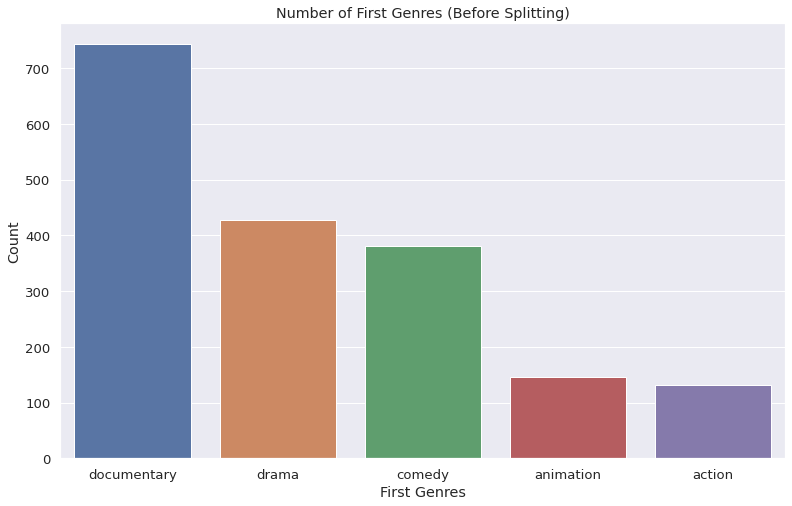

In [4]:
# plot original target variable classes
plt.figure(figsize=(13,8))
sns.set(font_scale = 1.2)
sns.countplot(x="first_genre", data=df,
order = df['first_genre'].value_counts().index)
plt.title("Number of First Genres (Before Splitting)")
plt.xlabel("First Genres")
plt.ylabel("Count")
plt.show()


## Downsampling the Majority class 

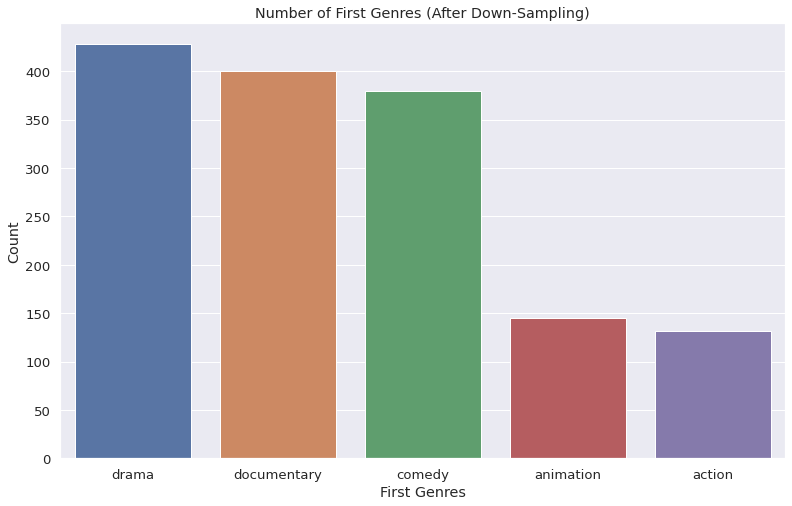

In [5]:
# Filter for documentaries and sample 400 rows from it
df_sample = df[df['first_genre'] == 'documentary'].sample(n=400)
# Create a separate DataFrame containing all other genres
df_sampleRest = df[df['first_genre'] != 'documentary']
# Concatenate the two DataFrame to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sample])


# plot new downsampled target variable classes
plt.figure(figsize=(13,8))
sns.set(font_scale = 1.2)
sns.countplot(x="first_genre", data=df_balanced,
order = df_balanced['first_genre'].value_counts().index)
plt.title("Number of First Genres (After Down-Sampling)")
plt.xlabel("First Genres")
plt.ylabel("Count")
plt.show()


In [6]:
# Split data set on 80% training and 20% test and keep target variable classes balanced
X_train, X_test, Y_train, Y_test = train_test_split(df_balanced['cleaned_plot'],\
df_balanced['first_genre'], test_size=0.2, random_state=42,\
stratify=df_balanced['first_genre'])

# Print shapes of training and testing data
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  1188
Size of Test Data  297


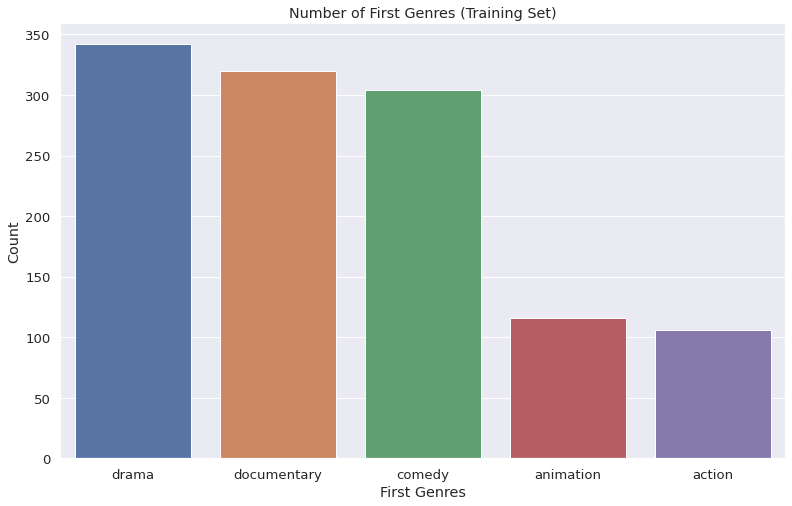

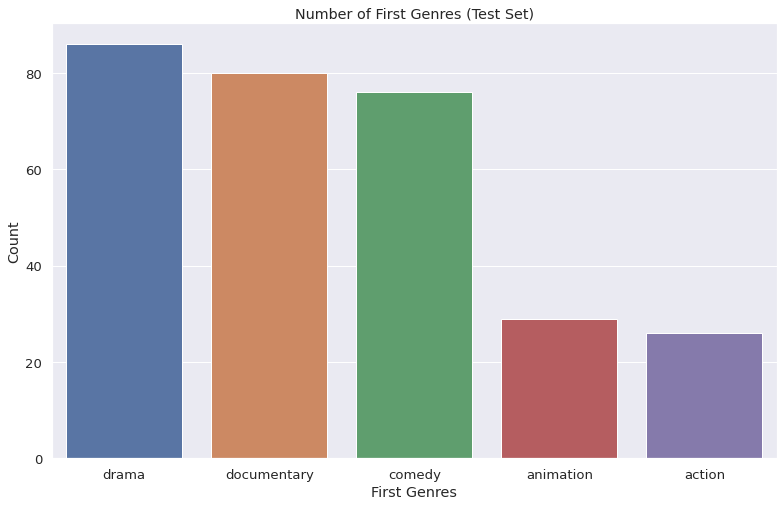

In [7]:
# plot original target variable classes
plt.figure(figsize=(13,8))
training_y = pd.DataFrame(Y_train)
sns.set(font_scale = 1.2)
sns.countplot(x = "first_genre", data=training_y,
order = training_y['first_genre'].value_counts().index)
plt.title("Number of First Genres (Training Set)")
plt.xlabel("First Genres")
plt.ylabel("Count")
plt.show()

# plot original target variable classes
plt.figure(figsize=(13,8))
test_y = pd.DataFrame(Y_test)
sns.set(font_scale = 1.2)
sns.countplot(x = "first_genre", data=test_y,
order = test_y['first_genre'].value_counts().index)
plt.title("Number of First Genres (Test Set)")
plt.xlabel("First Genres")
plt.ylabel("Count")
plt.show()


# Step 3: Training the Machine Learning Model

- Use TFIDF transformer for words to features
- Model 1: Linear SVC

## Use TFIDF transformer for words to features

In [8]:
tfidf = TfidfVectorizer(min_df = 10, stop_words=stopwords)
X_train_tf = tfidf.fit_transform(X_train)

## Model 1: Linear SVC

In [9]:
model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

LinearSVC(random_state=0, tol=1e-05)

# Step 4: Model Evaluation

- Model 1 Evaluation
- Baseline model evaluation
- Using Cross-Validation to Estimate Accuracy

## Model 1 Evaluation

In [10]:
# Model 1 evaluation
X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred))

Accuracy Score -  0.5488215488215489


## Baseline Model Evaluation

In [11]:
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score - ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score -  0.2895622895622896


## Cross-validation to Estimate Accuracy

In [12]:
tfidf = TfidfVectorizer(min_df = 10, stop_words=stopwords)
df_tf = tfidf.fit_transform(df_balanced['cleaned_plot']).toarray()

# Cross Validation with 5 folds
scores = cross_val_score(estimator=model1, X=df_tf, y=df_balanced['first_genre'], cv=5)
print ("Validation scores from each iteration of the cross validation ", scores)
print ("Mean value across of validation scores ", scores.mean())
print ("Standard deviation of validation scores ", scores.std())

Validation scores from each iteration of the cross validation  [0.47138047 0.48148148 0.49158249 0.41077441 0.5016835 ]
Mean value across of validation scores  0.47138047138047134
Standard deviation of validation scores  0.03194219858755938


# Performing Hyperparameter Tuning with Grid Search

In [13]:
# Performing Hyperparameter Tuning with Grid Search

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53ef1faa-b7a9-4637-b54c-3b067e58670d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>